# Profit Prediction with Machine Learning


The profit earned by a company for a particular period depends on several factors like how much time and money a company spends on R&D, Marketing and many more. So for prediction the profit of a company for a particular period we need a train a machine learning model with a dataset that contains historical data about the profit generated by the company.
The task of predicting profit is an important task for every business to set an achievable goal.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data= pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv")

In [7]:
data.to_csv('startups.csv')

In [6]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Lets visualize the correlation in the dataset

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8908\1863287994.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='coolwarm')


<AxesSubplot:>

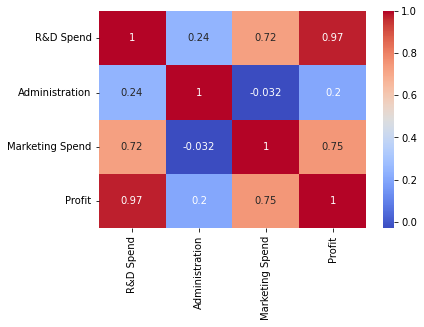

In [14]:

sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

### Divide the dataset into Features and Target set

In [15]:
X = data.iloc[:,:-2]
Y = data.iloc[:,-1]

In [16]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [17]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### Train Test Split 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

## Train the model

In [20]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()

linReg.fit(x_train,y_train)

LinearRegression()

## Test and Evaluation of model

In [21]:
y_pred = linReg.predict(x_test)

In [22]:
score = linReg.score(x_test,y_test)

In [23]:
print(score*100)

90.0065308303732


## The model is 90% accurate

In [24]:
y_pred

array([126703.02716461,  84894.75081556,  98893.41815974,  46501.70815036,
       129128.39734381,  50992.69486261, 109016.5536578 , 100878.4641454 ,
        97700.59638629, 113106.15292226])

In [25]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

## Predictions

In [26]:
linReg.predict([[162597.70,151377.59,443898.53]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([188349.65891895])